In [ ]:
# !pip install librosa


In [ ]:
# !pip install mir_eval

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
from ipywidgets import interact
from IPython.display import Audio
import mir_eval.sonify

import os
import soundfile as sf


In [19]:
# https://github.com/librosa/librosa/blob/main/docs/examples/plot_audio_playback.py

In [314]:
# ten second sample
y, sr = librosa.load('audio/out2.wav', duration=10)
S = np.abs(librosa.stft(y))


ipd.Audio(y, rate=sr)

In [315]:
tempo, beat_times = librosa.beat.beat_track(y=y, sr=sr, start_bpm=60, units='time')


In [316]:
print(tempo)

45.333059210526315


In [317]:
print(beat_times)

[1.83437642 3.13469388 4.45823129 5.78176871 7.10530612 8.42884354]


In [318]:
# time frame beats
librosa.frames_to_time(beat_times, sr=sr)

array([0.04258503, 0.07274376, 0.10349206, 0.13424036, 0.16494331,
       0.19569161])

In [ ]:
# separate harmonic-percussive
# https://librosa.org/doc/main/auto_examples/plot_hprss.html

#harmonic-percussive-source-separation
# https://librosa.org/doc/main/effects.html

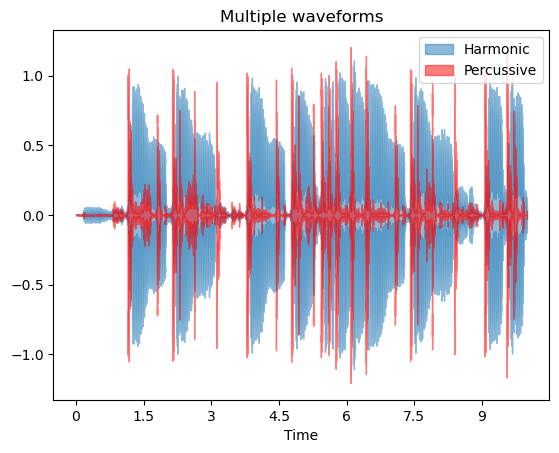

In [319]:
fig, ax = plt.subplots(nrows=1, sharex=True)


y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Multiple waveforms')
ax.legend()

In [320]:
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D)

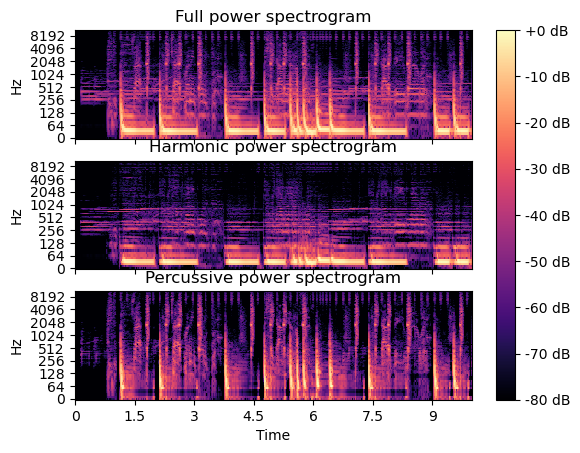

In [321]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

# plot full spectrogram
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Full power spectrogram')
ax[0].label_outer()

# plot harmonic spectrogram
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(D))), 
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()

# plot percussive spectrogram
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [ ]:
# onset detection

In [39]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)

In [82]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
print(onset_times.size)

[0.20897959 0.37151927 0.510839   0.62693878 1.27709751 1.43963719
 1.57895692 1.7414966  1.83437642 2.67029478 2.94893424 3.27401361
 4.5046712  5.08517007 5.41024943 5.7353288  6.31582766 6.64090703
 7.2678458  7.56970522 7.87156463 8.47528345 9.07900227 9.9845805 ]
24


In [234]:
# does onset match beat times?
print(beat_times)

[0.20897959 1.43963719 2.67029478 3.90095238 5.10839002 6.33904762
 7.56970522]


In [ ]:
 # percussion augmentation

In [ ]:
# output # note to midi

In [ ]:
# visualize
# wav to spectro


In [160]:
# spectro to audio

#librosa.feature.inverse.mel_to_audio
# https://librosa.org/doc/main/generated/librosa.feature.inverse.mel_to_audio.html

# aud = librosa.feature.inverse.mel_to_audio(D)


In [161]:
# https://github.com/Nicolas-M-Wong/Deep-Learning-approach-to-Noise-Filtering/blob/main/Autoencoder-For-Bird-Denoising.py
def mel_2_audio (spectrogram,sr,name):
    x = librosa.feature.inverse.mel_to_audio(spectrogram)
    sf.write(name,x,sr)

In [177]:
def plot_mel_spec (scale):
    sr = 22050
    plt.figure()
    X = librosa.stft(scale)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogramme MEL')
    plt.tight_layout()
    plt.show()

In [178]:
def noise_addition(data_set):
    noise_factor = 0.2
    max_power = np.random.randint(0,150)/500
    noisy_data = data_set + noise_factor * np.random.normal(loc=0.0, scale=max_power, size=data_set.shape)
    return (noisy_data)

In [179]:
length = 216


In [180]:
empty_matrix = np.zeros((1,128,216,1))
empty_matrix = noise_addition(empty_matrix)

In [308]:
print(type(empty_matrix))
print(empty_matrix.shape)

<class 'numpy.ndarray'>
(1, 128, 216, 1)


In [182]:
# print(type(x))

<class 'numpy.ndarray'>


In [322]:
# y, sr = librosa.load(librosa.util.example_audio_file(), duration=5, offset=10)
# S = np.abs(librosa.stft(y))
mel_spec = librosa.feature.melspectrogram(S=S, sr=sr)
S_inv = librosa.feature.inverse.mel_to_stft(mel_spec, hop_length=128,sr=sr)

In [325]:
# from scipy.io import wavfile

In [326]:
# wavfile.write('audio/test2.wav', 16000, S_inv.astype(np.int16))

In [323]:
# x = librosa.feature.inverse.mel_to_audio(empty_matrix)
# sf.write("test1.wav", x)
mel_2_audio(S_inv,sr,"audio/test1.wav")


In [324]:
print(type(mel_spec))

<class 'numpy.ndarray'>


In [ ]:
# https://github.com/jfcc3101/proyecto_tesis/blob/master/An%C3%A1lisis%20de%20Audio/librosa/feature/inverse.py